## Лабораторная №1 "Тело, брошенное под углом к горизонту"

<img src="telo.jpg">

Угол полета: $$ \alpha = 45^0 $$

In [1]:
alfa = 45 * 3.14 / 180

Начальная скорость полета: $$ V = 20 м/с $$

In [2]:
v = 20

Проекции на оси (начальная скорость):  
$$ V_{ox} = V * cos(\alpha) $$  
$$ V_{oy} = V * sin(\alpha) $$ 

In [3]:
from math import *
vox = v * cos(alfa)
voy = v * sin(alfa)

Гравитационная постоянная: $$ g = 9.81 $$

In [4]:
g = 9.81

### Случай 1: Сопротивление воздуха отсутствует $k = 0$

Дальность полета: $$ L = 2 * \frac{V_{ox} * V_{oy}}{g} $$  
Время полета: $$ t = \frac{(L - x_o)}{V_{ox}} $$

In [5]:
L = 2 * vox * voy / g
t = (L - 0) / vox

Количество итераций возьмем: $$ n = 10 $$

In [6]:
steps = 10

Шаг по времени составит: $$ \Delta t = \frac{t}{n} $$

In [7]:
deltaT = t / steps

Условия для скорости:  
$$ \frac{\mathrm{d}V_x}{\mathrm{d}t} = 0 $$  
$$ \frac{\mathrm{d}V_y}{\mathrm{d}t} = -g $$

Численно найдем:  
$$ V_x^{j+1} = V_x^j $$  
$$ V_y^{j+1} = V_y^j - g \Delta t $$

In [8]:
import numpy as np
# Столько точек будет на графике:
length = steps + 2

# Инициализируем массив нулями:
vx = np.zeros((length))
vy = np.zeros((length))

# Присваиваем переменным начальные значения:
vx[0] = vox
vy[0] = voy

# напишим функцию для инициализации массива скоростей:
def initSpeedArray(array, addNum):
    for i in range(0, array.size - 1):
      array[i+1] = array[i] + addNum; 

# Инициализируем массивы значениями:
initSpeedArray(vx, 0)
initSpeedArray(vy, - g * deltaT)

# Распечатаем их:
# print(vx)
# print(vy)

Условия для расстояния:  
$$ \frac{\mathrm{d}x}{\mathrm{d}t} = V_x $$  
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = V_y $$

Численно найдем:  
$$ x^{j+1} = x^j + V_x^j\Delta t $$  
$$ y^{j+1} = y^j - V_y^j\Delta t $$

In [18]:
f = 150


In [9]:
# Инициализируем массив нулями:
x = np.zeros((length))
y = np.zeros((length))

# Начальные значения нули

# напишим функцию для инициализации массива расстояний:
def initDistanceArray(d_array, v_array, delta):
    for i in range(0, d_array.size - 1):
      d_array[i+1] = d_array[i] + v_array[i] * delta; 

# Инициализируем массивы значениями:
initDistanceArray(x, vx, deltaT)
initDistanceArray(y, vy, deltaT)

# Распечатаем их:
# print(x)
# print(y)

Построим график траектории движения тела:

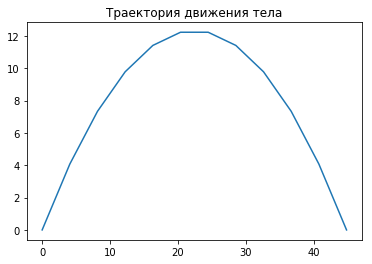

In [17]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title("Траектория движения тела")
# plt.legend(('k = 1'))
plt.show()

### Случай 2: Сопротивление воздуха отсутствует $ K = 1 $

In [11]:
k = 1

Массу тела примем: $$ m = 10 $$

In [12]:
m = 10

В этот раз зададим шаг по времени: $$ \Delta t = 0.01 $$

In [13]:
deltaT = 0.01

Условия для скорости:  
$$ \frac{\mathrm{d}V_x}{\mathrm{d}t} = \frac{k}{m}V_x $$  
$$ \frac{\mathrm{d}V_y}{\mathrm{d}t} = -g - \frac{k}{m}V_y $$

Численно найдем:  
$$ V_x^{j+1} = V_x^j - \frac{k}{m}V_x^j \Delta t $$  
$$ V_y^{j+1} = V_y^j - (g + \frac{k}{m}V_y^j)\Delta t $$

In [14]:
steps = 275
# Столько точек будет на графике:
length = steps + 2

# Инициализируем массив нулями:
vx = np.zeros((length))
vy = np.zeros((length))

# Присваиваем переменным начальные значения:
vx[0] = vox
vy[0] = voy 

# Инициализируем массивы значениями:
initDistanceArray(vx, vx, - k * deltaT / m) # это скорость!

def initSpeedArray_2(d_array, v_array, c1, c2, c3):
    for i in range(0, d_array.size - 1):
      d_array[i+1] = d_array[i] - (c1 + c2 * v_array[i]) * c3;

initSpeedArray_2(vy, vy, g, k / m, deltaT)

# Распечатаем их:
# print(vx)
# print(vy)

Условия для расстояния:  
$$ \frac{\mathrm{d}x}{\mathrm{d}t} = V_x $$  
$$ \frac{\mathrm{d}y}{\mathrm{d}t} = V_y $$

Численно найдем:  
$$ x^{j+1} = x^j + V_x^j \Delta t $$  
$$ y^{j+1} = y^j + V_y^j \Delta t $$

In [15]:
# Инициализируем массив нулями:
x1 = np.zeros((length))
y1 = np.zeros((length))

# Начальные значения нули

# напишим функцию для инициализации массива расстояний:
def initDistanceArray(d_array, v_array, delta):
    for i in range(0, d_array.size - 1):
      d_array[i+1] = d_array[i] + v_array[i] * delta; 

# Инициализируем массивы значениями:
initDistanceArray(x1, vx, deltaT)
initDistanceArray(y1, vy, deltaT)

# Распечатаем их:
# print(x1)
# print(y1)

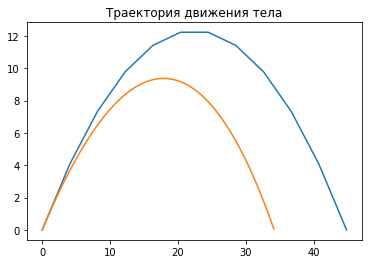

In [16]:
plt.plot(x, y, x1, y1)
plt.title("Траектория движения тела")
plt.show()